# Домашнее задание "Функции потерь и оптимизация"

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
# from sklearn.pipeline import make_pipeline 
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
iris = load_iris()


X,y = load_iris(return_X_y=True)
filter = y != 2              # накладываем фильтр - только 2 признака
X = X[filter]
Y = y[filter]

params = np.random.normal(size=(5,))
# params = np.array([ 1.50617485,  0.16318188, -1.14657583,  0.24675052, -0.12343626])


In [2]:
def predict(params, X):
    #Линейная регрессия
    predict = params[0] + params[1] * X[:, 0] + params[2] * X[:, 1] + params[3] * X[:, 2] + params[4] * X[:, 3]
    #Функция логистического отклика,  сигмоид-функция
    cost = 1. / (1 + np.exp(-predict))
    return cost

# Метод градиентного спуска:

In [3]:

EPOCHS = 120
LEARNING_RATE = 0.05

costs = []
preds = []
for _ in range(EPOCHS):
#     для статистики считаем общее предсказание и функцю потерь
    predictions = predict(params, X)  
    preds.append(predictions)

    cost = - np.mean(np.log(predictions) * Y + np.log(1 - predictions) * (1 - Y)) #- функция потерь
    costs.append(cost)
      
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X[:, 0]) / len(predictions)
    params[2] -= LEARNING_RATE * np.sum((predictions - Y) * X[:, 1])/ len(predictions)
    params[3] -= LEARNING_RATE * np.sum((predictions - Y) * X[:, 2]) / len(predictions)
    params[4] -= LEARNING_RATE * np.sum((predictions - Y) * X[:, 3])/ len(predictions)
    
params

array([ 0.62987233, -1.10792207, -0.02413911,  2.05444127, -0.26261507])

In [4]:
costs

[1.3775245084626315,
 1.0791959930136692,
 0.9218577438899815,
 0.8551657999404567,
 0.8187988187815946,
 0.7898230896320425,
 0.7631584646284495,
 0.7378588793325165,
 0.7137269637635814,
 0.6906905966424967,
 0.6686984513157919,
 0.6477032170921284,
 0.6276590634322348,
 0.6085213737226247,
 0.5902468220651181,
 0.5727934814911048,
 0.5561209133311157,
 0.5401902313062669,
 0.5249641417933062,
 0.5104069631991743,
 0.4964846275509801,
 0.4831646672471599,
 0.47041618965670323,
 0.4582098419657104,
 0.44651776838151025,
 0.43531356152700185,
 0.42457220959851116,
 0.41427004062281975,
 0.40438466493463077,
 0.3948949168048479,
 0.3857807959820007,
 0.3770234097627359,
 0.3686049160809282,
 0.3605084679968785,
 0.3527181598764002,
 0.345218975472531,
 0.3379967380583707,
 0.3310380627064914,
 0.3243303107669735,
 0.31786154656101867,
 0.3116204962790344,
 0.3055965090500072,
 0.29977952013191006,
 0.29416001616000065,
 0.2887290023804493,
 0.28347797179016093,
 0.27839887609941927,
 0.

In [5]:
# Сравниваем результаты классификации
np.matrix([np.around(predict(params, X)), Y]).T

matrix([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1

In [6]:
#ищем количество ошибок
err = 0
for idx, item in enumerate(np.around(predict(params, X))):
    if item != Y[idx]:
        err += 1
err

0

# метод нестерова

In [7]:
vt = np.zeros(5)
vt_1 = np.zeros(5)
nesterov = []
preds1 = []
momentum = 0.975
EPOCHS = 120
LEARNING_RATE = 0.05
params1 = np.random.normal(size=(5,))
# params1 = np.array([ 1.50617485,  0.16318188, -1.14657583,  0.24675052, -0.12343626])

for _ in range(EPOCHS):
    predictions = predict(params1, X)    
    preds1.append(predictions)
    cost1 = - np.mean(np.log(predictions) * Y + np.log(1 - predictions) * (1 - Y)) #- функция потерь
    nesterov.append(cost1)
    
    predictions = predict(params1 - momentum * vt, X)
    
    vt_1[0] = (momentum * vt[0] + LEARNING_RATE * np.sum(predictions - Y))/len(predictions)
    vt_1[1] = (momentum * vt[1] + LEARNING_RATE * np.sum((predictions - Y) * X[:, 0]))/len(predictions)
    vt_1[2] = (momentum * vt[2] + LEARNING_RATE * np.sum((predictions - Y) * X[:, 1]))/len(predictions)
    vt_1[3] = (momentum * vt[3] + LEARNING_RATE * np.sum((predictions  - Y) * X[:, 2]))/len(predictions)
    vt_1[4] = (momentum * vt[4] + LEARNING_RATE * np.sum((predictions - Y) * X[:, 3]))/len(predictions)
    params1 -= vt_1
    print(params1)
    vt = vt_1

[ 1.24006149  0.29227324 -0.27519235  0.5149467  -0.77129122]
[ 1.22211741  0.20451716 -0.33806148  0.49502597 -0.77318437]
[ 1.20758867  0.13513205 -0.3899316   0.48370283 -0.77281469]
[ 1.19691171  0.08659792 -0.4294767   0.48242559 -0.76976549]
[ 1.18852501  0.05044106 -0.46167901  0.48704505 -0.76515633]
[ 1.1821506   0.02515977 -0.48743704  0.49685064 -0.7591769 ]
[ 1.17690796  0.00592162 -0.50952154  0.50935142 -0.75251322]
[ 1.17266891 -0.00797241 -0.52834206  0.52420251 -0.74525869]
[ 1.16896627 -0.01909428 -0.54536025  0.54005656 -0.7377863 ]
[ 1.16577241 -0.02759137 -0.56066764  0.55685073 -0.73011181]
[ 1.1628397  -0.03482652 -0.57503817  0.57387099 -0.72243269]
[ 1.16017669 -0.04074761 -0.58844984  0.59115897 -0.71473569]
[ 1.15765158 -0.04607806 -0.60131573  0.60834026 -0.70712375]
[ 1.15527948 -0.05072949 -0.61359299  0.62547514 -0.69957844]
[ 1.15299043 -0.05508377 -0.62550243  0.64237137 -0.69215192]
[ 1.15079635 -0.05907039 -0.63701083  0.65907897 -0.68482871]
[ 1.1486

In [8]:
nesterov

[1.6612428733285305,
 1.2257286605663764,
 0.9382955087554256,
 0.7480615606842236,
 0.6416341183030057,
 0.5786864130567388,
 0.5417292121605649,
 0.5165194146892829,
 0.4980032466613048,
 0.4825359546241239,
 0.4689907087954968,
 0.4564944625479667,
 0.4448016310530862,
 0.4336919758032633,
 0.42309947496986433,
 0.4129561977998706,
 0.4032326529501445,
 0.39389791097337223,
 0.3849311888016589,
 0.37631180568708006,
 0.36802227155838485,
 0.36004577080709504,
 0.35236691899152134,
 0.3449711130653616,
 0.33784468469006407,
 0.3309747083774486,
 0.32434900703637576,
 0.3179560742021499,
 0.31178504661429157,
 0.30582565751437174,
 0.30006820427817976,
 0.2945035125317609,
 0.28912290545534847,
 0.283918173471449,
 0.27888154660290526,
 0.2740056681176632,
 0.2692835700273716,
 0.26470864999088783,
 0.26027464971873693,
 0.25597563469461415,
 0.2518059751833119,
 0.2477603284205821,
 0.24383362192468166,
 0.24002103785250362,
 0.23631799833754916,
 0.23272015174540275,
 0.229223359788

In [9]:
# Смотрим, сколько допустили ошибок при классификации
err = 0
for idx, item in enumerate(np.around(predict(params1, X))):
    if item != Y[idx]:
        err += 1
err

0

In [10]:
np.matrix([np.around(predict(params1, X)), Y]).T

matrix([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1

# RMSProp

In [11]:
params2 = np.random.normal(size=(5,))
# params2 = np.array([ 1.50617485,  0.16318188, -1.14657583,  0.24675052, -0.12343626])
vt = np.zeros(5)
vt_1 = np.zeros(5)
preds2 = []
momentum1 = 0.95
EPOCHS = 120
LEARNING_RATE = 0.05

e_sq_grad = np.zeros(5)
grad = np.zeros(5)
rmsp = []
eps = 0.00000001
for _ in range(EPOCHS):
    predictions = predict(params2, X)
    preds2.append(predictions)
    cost2 = - np.mean(np.log(predictions) * Y + np.log(1 - predictions) * (1 - Y))
    rmsp.append(cost2)
    grad[0] = np.sum(predictions - Y)/len(predictions)
    grad[1] = np.sum((predictions - Y) * X[:, 0])/len(predictions)
    grad[2] = np.sum((predictions - Y) * X[:, 1])/len(predictions)
    grad[3] = np.sum((predictions - Y) * X[:, 2])/len(predictions)
    grad[4] = np.sum((predictions- Y) * X[:, 3])/len(predictions)
    
    e_sq_grad = momentum1 * e_sq_grad + (1 - momentum1)  * grad ** 2
    
    params2 -= LEARNING_RATE * grad / np.sqrt(e_sq_grad + eps)
    print(params2)  

[-1.03063421 -0.3734474   0.76260941 -0.06491228  0.09720498]
[-0.93314749 -0.24639868  0.8205649   0.14916196  0.32005216]
[-1.03705428 -0.33563701  0.70193754  0.16108588  0.36602333]
[-1.04319445 -0.32098731  0.67119157  0.25708063  0.4740334 ]
[-1.08930588 -0.3512915   0.60831008  0.30796231  0.54138661]
[-1.11082522 -0.35616448  0.56838479  0.37296296  0.61614732]
[-1.14048445 -0.37114848  0.52324207  0.42477059  0.67794629]
[-1.16325955 -0.37963265  0.48530582  0.47689691  0.73772282]
[-1.18653663 -0.38960404  0.44818939  0.52400913  0.79186799]
[-1.20745437 -0.39780173  0.41410629  0.56898779  0.8428674 ]
[-1.22747311 -0.40574577  0.38171326  0.61117572  0.89048173]
[-1.24626085 -0.41298957  0.35116857  0.65123741  0.93539996]
[-1.26412089 -0.41980103  0.32212786  0.68928678  0.97786429]
[-1.28110509 -0.42617855  0.29446681  0.72557681  1.01818901]
[-1.29732305 -0.43219251  0.26802626  0.76027568  1.05660322]
[-1.31284895 -0.43788043  0.24268567  0.79354323  1.09331192]
[-1.3277

In [12]:
rmsp

[1.185022885584888,
 1.0336171417919342,
 0.8089508803825347,
 0.6822183752847795,
 0.6037308122755293,
 0.5404921065776734,
 0.4883910187609572,
 0.4441582720904723,
 0.40624467914526186,
 0.373397353289417,
 0.34472546050177316,
 0.3195143527353841,
 0.2972034833103507,
 0.2773410557129053,
 0.25956174645125657,
 0.24356699633514864,
 0.2291110429990814,
 0.21599002756639105,
 0.2040336692119428,
 0.19309878940206293,
 0.18306424720456238,
 0.17382694477534705,
 0.16529865403874233,
 0.15740347781365732,
 0.15007580483656452,
 0.14325865199391616,
 0.1369023121985208,
 0.13096324510579177,
 0.1254031619809347,
 0.12018826672222303,
 0.11528862320286563,
 0.1106776253572769,
 0.1063315512771307,
 0.10222918634495784,
 0.098351503375266,
 0.09468139004709747,
 0.09120341574172887,
 0.08790363135379989,
 0.08476939680634411,
 0.08178923193331387,
 0.07895268714591928,
 0.0762502309090754,
 0.07367315155070689,
 0.07121347133242371,
 0.06886387104307862,
 0.06661762365106115,
 0.06446853

In [13]:
# Смотрим, сколько допустили ошибок при классификации
err = 0
for idx, item in enumerate(np.around(predict(params2, X))):
    if item != Y[idx]:
        err += 1
err

0

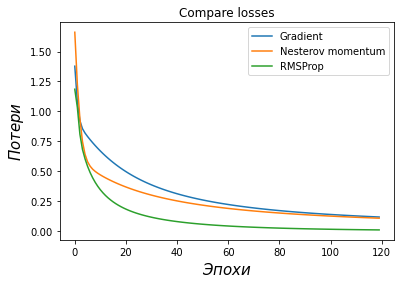

In [14]:
# Сравним скорость убывания ошибки
plt.plot(costs, label='Gradient' )
plt.plot(nesterov, label='Nesterov momentum' )
plt.plot(rmsp, label='RMSProp' )
plt.title('Compare losses')
plt.xlabel('$Эпохи$', fontsize=15)
plt.ylabel('$Потери$', fontsize=15)
plt.legend()
plt.show()

###### Согласно графика RMSProp показал лучшие результаты